<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6_%E1%84%92%E1%85%AC%E1%84%80%E1%85%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [2]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) 데이터 불러오기 및 데이터 선택

In [7]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/esaa_data/abalone (2).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [29]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,False,True
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,True,False,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,True,False


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [8]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [9]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [12]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = y_pred + 1.5

#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse, rmse)


5.013158686100955 2.239008415817358


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [13]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [14]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
from sklearn.model_selection import cross_val_score

for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 2.192 
alpha 0.1 일 때 5 folds의 평균 RMSE : 2.189 
alpha 1 일 때 5 folds의 평균 RMSE : 2.192 
alpha 10 일 때 5 folds의 평균 RMSE : 2.336 
alpha 100 일 때 5 folds의 평균 RMSE : 2.604 


- alpha = 0.1일때 rmse 최소

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [22]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [24]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor() #### error 
xgb_reg.fit(X_train, y_train)
#예측값 구하기
y_pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = y_pred + 1.5

#MSE와 RMSE 구하기

[09:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(objective='reg:squarederror') #### 해결
xgb_reg.fit(X_train, y_train)
#예측값 구하기
y_pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = y_pred + 1.5

#MSE와 RMSE 구하기
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse, rmse)


4.947366826380743 2.2242677056462297


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

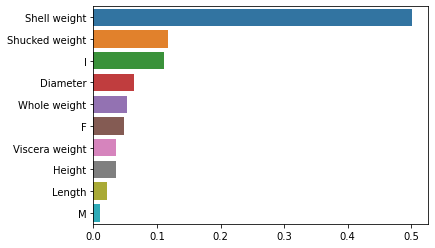

In [30]:
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns )
feature_series = feature_series.sort_values(ascending = False) # 내림차순
sns.barplot(x = feature_series, y = feature_series.index)


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [31]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [32]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [36]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

display(X_train.shape) 
display(y_train.shape )

(124, 13)

(124,)

In [40]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [37]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [38]:
#기울기
lr_clf.coef_

array([[-1.99751167e-01,  3.65450552e-01,  1.49472112e-01,
        -1.88027149e-01, -2.28495646e-02,  1.95456485e-01,
         4.66701265e-01, -1.66796661e-02,  8.23897101e-02,
         6.75011473e-02, -1.92621856e-02,  2.94915749e-01,
         7.42524049e-03],
       [ 5.96475829e-01, -7.88672591e-01, -1.26181429e-01,
         2.12254654e-01, -1.13504800e-02,  3.15785912e-01,
         3.55147976e-01,  3.34675580e-02,  2.79035669e-01,
        -1.17202474e+00,  2.61165677e-01,  4.64731544e-01,
        -8.33633158e-03],
       [-3.96724662e-01,  4.23222039e-01, -2.32906833e-02,
        -2.42275051e-02,  3.42000446e-02, -5.11242396e-01,
        -8.21849241e-01, -1.67878919e-02, -3.61425379e-01,
         1.10452359e+00, -2.41903492e-01, -7.59647293e-01,
         9.11091084e-04]])

In [39]:
#절편
lr_clf.intercept_

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(y_test, lr_preds)

0.9629629629629629

In [45]:
# roc_auc는 binary classification의 경우 가능
lr_preds

array([2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 2, 2, 1])

In [42]:
#모델의 예측값 구하기
from sklearn.metrics import accuracy_score, roc_auc_score


#모델의 정확도 구하기

# accuracy와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.963


ValueError: ignored